In [1]:
## Importing packages
library(tidyverse) # metapackage with lots of helpful functions
library(magrittr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



# Exploring the police dataset

Alright, lets get started. First, load the data (csv) from the SDS server

In [2]:
data <- read_csv("http://sds-datacrunch.aau.dk/public/RI-clean.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  stop_date = col_date(format = ""),
  stop_time = col_time(format = ""),
  county_name = col_logical(),
  county_fips = col_logical(),
  fine_grained_location = col_logical(),
  driver_age_raw = col_double(),
  driver_age = col_double(),
  search_conducted = col_logical(),
  contraband_found = col_logical(),
  is_arrested = col_logical(),
  out_of_state = col_logical(),
  drugs_related_stop = col_logical()
)
See spec(...) for full column specifications.


Lets do a first inspection of the dataset.

In [3]:
data %>% head()

id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,⋯,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
<chr>,<chr>,<date>,<time>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
RI-2005-00001,RI,2005-01-02,01:55:00,Zone K1,NA,NA,NA,600,M,⋯,FALSE,NA,NA,FALSE,Citation,FALSE,0-15 Min,FALSE,FALSE,Zone K1
RI-2005-00002,RI,2005-01-02,20:30:00,Zone X4,NA,NA,NA,500,M,⋯,FALSE,NA,NA,FALSE,Citation,FALSE,16-30 Min,FALSE,FALSE,Zone X4
RI-2005-00003,RI,2005-01-04,11:30:00,Zone X1,NA,NA,NA,000,NA,⋯,FALSE,NA,NA,FALSE,NA,NA,NA,NA,FALSE,Zone X1
RI-2005-00004,RI,2005-01-04,12:55:00,Zone X4,NA,NA,NA,500,M,⋯,FALSE,NA,NA,FALSE,Citation,FALSE,0-15 Min,FALSE,FALSE,Zone X4
RI-2005-00005,RI,2005-01-06,01:30:00,Zone X4,NA,NA,NA,500,M,⋯,FALSE,NA,NA,FALSE,Citation,FALSE,0-15 Min,FALSE,FALSE,Zone X4
RI-2005-00006,RI,2005-01-12,08:05:00,Zone X1,NA,NA,NA,000,M,⋯,FALSE,NA,NA,FALSE,Citation,FALSE,30+ Min,TRUE,FALSE,Zone X1


In [4]:
data %>% glimpse()

Observations: 509,681
Variables: 26
$ id                    <chr> "RI-2005-00001", "RI-2005-00002", "RI-2005-0000…
$ state                 <chr> "RI", "RI", "RI", "RI", "RI", "RI", "RI", "RI",…
$ stop_date             <date> 2005-01-02, 2005-01-02, 2005-01-04, 2005-01-04…
$ stop_time             <time> 01:55:00, 20:30:00, 11:30:00, 12:55:00, 01:30:…
$ location_raw          <chr> "Zone K1", "Zone X4", "Zone X1", "Zone X4", "Zo…
$ county_name           <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ county_fips           <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ fine_grained_location <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA,…
$ police_department     <chr> "600", "500", "000", "500", "500", "000", "300"…
$ driver_gender         <chr> "M", "M", NA, "M", "M", "M", "M", "M", "M", "M"…
$ driver_age_raw        <dbl> 1985, 1987, NA, 1986, 1978, 1973, 1965, 1967, 1…
$ driver_age            <dbl> 20, 18, NA, 19, 27, 32, 40, 38, 33, 18, 29, 27,…
$ driver_race_ra

- Each row is one traffic stop
- NaN are missing values

In [5]:
data %>%
filter(driver_gender %>% is.na()) %>%
head()

id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,⋯,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
<chr>,<chr>,<date>,<time>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
RI-2005-00003,RI,2005-01-04,11:30:00,Zone X1,NA,NA,NA,000,NA,⋯,FALSE,NA,NA,FALSE,NA,NA,NA,NA,FALSE,Zone X1
RI-2005-00018,RI,2005-03-05,00:20:00,Zone X4,NA,NA,NA,500,NA,⋯,FALSE,NA,NA,FALSE,NA,NA,NA,NA,FALSE,Zone X4
RI-2005-00036,RI,2005-06-08,08:40:00,Zone X4,NA,NA,NA,500,NA,⋯,FALSE,NA,NA,FALSE,NA,NA,NA,NA,FALSE,Zone X4
RI-2005-00075,RI,2005-08-17,13:20:00,Zone X1,NA,NA,NA,000,NA,⋯,FALSE,NA,NA,FALSE,NA,NA,NA,NA,FALSE,Zone X1
RI-2005-00076,RI,2005-08-17,15:59:00,Zone X1,NA,NA,NA,000,NA,⋯,FALSE,NA,NA,FALSE,NA,NA,NA,NA,FALSE,Zone X1
RI-2005-00081,RI,2005-08-24,18:00:00,Zone X1,NA,NA,NA,000,NA,⋯,FALSE,NA,NA,FALSE,NA,NA,NA,NA,FALSE,Zone X1


Lets use `summarize_all()` and `gather()` to get an overview on missing values across the dataset.

In [6]:
data %>%
summarise_all(function(x) sum(is.null(x))) %>% gather()

key,value
<chr>,<int>
id,0
state,0
stop_date,0
stop_time,0
location_raw,0
county_name,0
county_fips,0
fine_grained_location,0
police_department,0


Clean the data a bit

In [0]:
# We drop the county_name columns.
data %<>%
select(-county_name)

In [0]:
# Drop all rows where stop_data, time, and driver_gender are missing
data %<>%
drop_na(stop_date, stop_time, driver_gender)

# Adjusting dates, times and index

In [11]:
# We start by concatenating the two string columns into one that we call combined, using paste()
datetime_stop <-  paste(data$stop_date, data$stop_time, sep = " ")

datetime_stop %>% head()

[1] "2005-01-02 01:55:00" "2005-01-02 20:30:00" "2005-01-04 11:30:00"
[4] "2005-01-04 12:55:00" "2005-01-06 01:30:00" "2005-01-12 08:05:00"

In [16]:
# The lubridate library helps us to transform strings into dates ore datetimes (timestamps)
library(lubridate)
datetime_stop  %>% 
as_datetime() %>%
head()

Warning message:
“ 10 failed to parse.”

[1] "2005-01-02 01:55:00 UTC" "2005-01-02 20:30:00 UTC"
[3] "2005-01-04 11:30:00 UTC" "2005-01-04 12:55:00 UTC"
[5] "2005-01-06 01:30:00 UTC" "2005-01-12 08:05:00 UTC"

# Explore the data step/by/step

In [19]:
# Count number of stop outcomes
data %>%
group_by(stop_outcome) %>%
summarize(n = n())

stop_outcome,n
<chr>,<int>
Arrest Driver,14630
Arrest Passenger,1973
Citation,428388
N/D,3431
No Action,3337
Warning,28849
NA,29073


In [20]:
# there are many ways to do the same thing. Meet count(), the short form of group_by(x) %>% summarize(n = n())
data %>%
count(stop_outcome, sort = TRUE)

stop_outcome,n
<chr>,<int>
Citation,428388
NA,29073
Warning,28849
Arrest Driver,14630
N/D,3431
No Action,3337
Arrest Passenger,1973


In [21]:
# Relative proportions
data %>%
count(driver_race, sort = TRUE) %>%
mutate(pct = (n / sum(n)) %>% round(2) )

driver_race,n,pct
<chr>,<int>,<dbl>
White,344734,0.68
Black,68579,0.13
Hispanic,53125,0.10
NA,29073,0.06
Asian,12826,0.03
Other,1344,0.00


### Let's try out some hypotheses

One hypothesis could be that the stop_outcome is different for different races. Discrimination?

In [22]:
data %>%
count(driver_race, stop_outcome) %>%
group_by(driver_race) %>%
mutate(pct = (n / sum(n)) %>% round(2) ) 


driver_race,stop_outcome,n,pct
<chr>,<chr>,<int>,<dbl>
Asian,Arrest Driver,231,0.02
Asian,Arrest Passenger,27,0.00
Asian,Citation,11899,0.93
Asian,N/D,60,0.00
Asian,No Action,76,0.01
Asian,Warning,533,0.04
Black,Arrest Driver,3379,0.05
Black,Arrest Passenger,559,0.01
Black,Citation,58874,0.86


Nice, can we have that also in a easy to investigate matrix? Sure, lets use `spread()`. Notice there are many more functions to do that, such as `prob.table`, but I here stay in the `dplyr` framework

In [23]:
data %>%
count(driver_race, stop_outcome) %>%
group_by(driver_race) %>%
mutate(pct = (n / sum(n, na.rm = TRUE)) %>% round(2) ) %>%
select(-n) %>%
spread(stop_outcome, pct)

driver_race,Arrest Driver,Arrest Passenger,Citation,N/D,No Action,Warning,<NA>
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Asian,0.02,0.00,0.93,0.00,0.01,0.04,NA
Black,0.05,0.01,0.86,0.01,0.01,0.07,NA
Hispanic,0.05,0.01,0.85,0.01,0.01,0.07,NA
Other,0.01,0.00,0.92,0.00,0.01,0.06,NA
White,0.02,0.00,0.90,0.01,0.01,0.06,NA
NA,NA,NA,NA,NA,NA,NA,1


We might also have a look at nice datasummary. The `summarytools` package has some nice functions to do so.

In [0]:
# install.packages("summarytools")
# library(summarytools)

In [0]:
# data %>% dfSummary()

### Filtering by multiple conditions

Again, we can use `dplyr` `filter()` with multiple conditions, or `group_by()` + `summarize()` for summaries in nested groups.

In [24]:
# Filter for being histanic and arrested
data %>%
filter(driver_race == "Hispanic" & is_arrested == TRUE) %>%
head(10)

id,state,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,⋯,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
<chr>,<chr>,<date>,<time>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,⋯,<lgl>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<lgl>,<lgl>,<chr>
RI-2005-00175,RI,2005-10-01,00:50:00,Zone X4,NA,NA,500,M,1977,⋯,FALSE,NA,NA,FALSE,Arrest Driver,TRUE,30+ Min,FALSE,FALSE,Zone X4
RI-2005-00180,RI,2005-10-01,01:30:00,Zone X4,NA,NA,500,M,1978,⋯,FALSE,NA,NA,FALSE,Arrest Driver,TRUE,30+ Min,FALSE,FALSE,Zone X4
RI-2005-00784,RI,2005-10-05,07:50:00,Zone X4,NA,NA,500,M,1957,⋯,FALSE,NA,NA,FALSE,Arrest Driver,TRUE,16-30 Min,FALSE,FALSE,Zone X4
RI-2005-00785,RI,2005-10-05,07:50:00,Zone X4,NA,NA,500,M,1957,⋯,FALSE,NA,NA,FALSE,Arrest Driver,TRUE,16-30 Min,FALSE,FALSE,Zone X4
RI-2005-00914,RI,2005-10-06,02:00:00,Zone X4,NA,NA,500,M,1979,⋯,FALSE,NA,NA,FALSE,Arrest Driver,TRUE,30+ Min,FALSE,FALSE,Zone X4
RI-2005-01057,RI,2005-10-07,00:50:00,Zone X4,NA,NA,500,M,1973,⋯,FALSE,NA,NA,FALSE,Arrest Driver,TRUE,16-30 Min,FALSE,FALSE,Zone X4
RI-2005-01060,RI,2005-10-07,00:50:00,Zone X4,NA,NA,500,M,1973,⋯,FALSE,NA,NA,FALSE,Arrest Driver,TRUE,16-30 Min,FALSE,FALSE,Zone X4
RI-2005-01810,RI,2005-10-12,06:38:00,Zone K2,NA,NA,502,M,1971,⋯,TRUE,Inventory/Tow,Inventory,FALSE,Arrest Driver,TRUE,30+ Min,FALSE,FALSE,Zone K2
RI-2005-01871,RI,2005-10-12,20:30:00,Zone K3,NA,NA,300,M,1987,⋯,TRUE,Terry Frisk,Protective Frisk,FALSE,Arrest Driver,TRUE,0-15 Min,FALSE,FALSE,Zone K3


##### Rules for filtering

- & AND
- | OR
- Each condition must be surrounded by () and many are possible
- == Equality
- != Inequality

##### Remember, that we are not making any statement about causation. This is purely a correlation exercise (so far!)

#### A bit on boolean series

True = 1 and False = 0
Which means that you can perform calculations on them:

In [25]:
# Create a DataFrame of male and female drivers stopped for speeding
# We can take a shortcut using `group_by`
data %>%
filter(violation == "Speeding") %>%
count(driver_gender, stop_outcome) %>%
group_by(driver_gender) %>%
mutate(pct = (n / sum(n, na.rm = TRUE)) %>% round(2) )


driver_gender,stop_outcome,n,pct
<chr>,<chr>,<int>,<dbl>
F,Arrest Driver,456,0.01
F,Arrest Passenger,89,0.00
F,Citation,82168,0.95
F,N/D,78,0.00
F,No Action,45,0.00
F,Warning,3362,0.04
M,Arrest Driver,2878,0.02
M,Arrest Passenger,231,0.00
M,Citation,172432,0.94


### "protective frisk"
Sometimes during stops if a search is conducted, the officer also checks the driver if they have a weapon. This is called a "protective frisk".
Let's try to figure out if men are frisked more than women.

In [26]:
# Look at the different search types performed
data %>%
count(search_type, sort = TRUE)


search_type,n
<chr>,<int>
NA,491919
Incident to Arrest,6998
Probable Cause,4989
Reasonable Suspicion,1141
Inventory,1101
Protective Frisk,879
"Incident to Arrest,Inventory",649
"Incident to Arrest,Probable Cause",552
"Probable Cause,Reasonable Suspicion",334


#### Extracting a string
As you can see, search type is a multiple choice object/string column. *Incident to Arrest* and *Pribable Cause* are the most commont but combinations are possible. Generally, to work with text strings, the `tioyverse` package `stringr` has many useful functions. We can use the `str_detect` method to filter to filter out cases of interest. This will return a boolean series, which we can assign to a new varioable 'frisk' in our dataframe.

**NOTE:** For missing search type values, `str_detect()` would traditionaly output an `NA`, therefore we beforehand replace them with an empty string with `replace_na("")`

In [0]:
data %<>%
mutate(frisk = search_type %>% replace_na("") %>% str_detect("Protective Frisk") )

In [29]:
# How many frisks have been performed? (1598)
# Notice that pull() extracts a vector from a dataframe
data %>% pull(frisk) %>% sum()

[1] 1598

## Using the datetime index to select data

What if you assume that things got better or worse over the years? Remember the `lubridate` package for handling date-times?

In [0]:
# Are things getting better or worse over the years?
library(lubridate)

In [0]:
data %<>%
mutate(year = year(stop_date), month = month(stop_date), day = day (stop_date)) %>%
drop_na(year)

In [49]:
data %>%
group_by(year) %>%
summarize(frisk_mean = frisk %>% mean())

year,frisk_mean
<dbl>,<dbl>
2005,0.0090205270
2006,0.0072673671
2007,0.0053568408
2008,0.0035700443
2009,0.0033829655
2010,0.0020287325
2011,0.0014412368
2012,0.0006247123
2013,0.0008056214


We can obviously also plot that with `ggplot`.

Note: We use `gather()` to create tidy data where multiple variables can be jointly plotted.

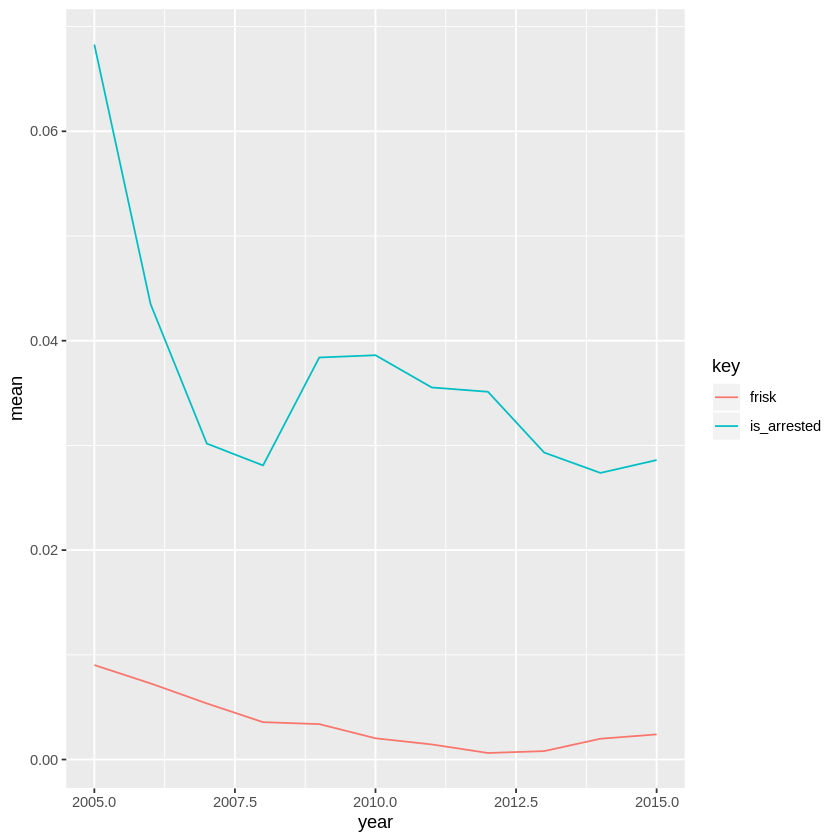

In [53]:
data %>%
group_by(year) %>%
summarize(frisk = frisk %>% mean(na.rm = TRUE), is_arrested = is_arrested %>% mean(na.rm = TRUE))  %>%
ungroup() %>% 
gather(key = "key", value = "mean", frisk, is_arrested) %>%
ggplot(aes(x = year, y = mean, color = key)) +
geom_line()

We can do grouping on different levels. For instance, lets see in which months we have most arrests

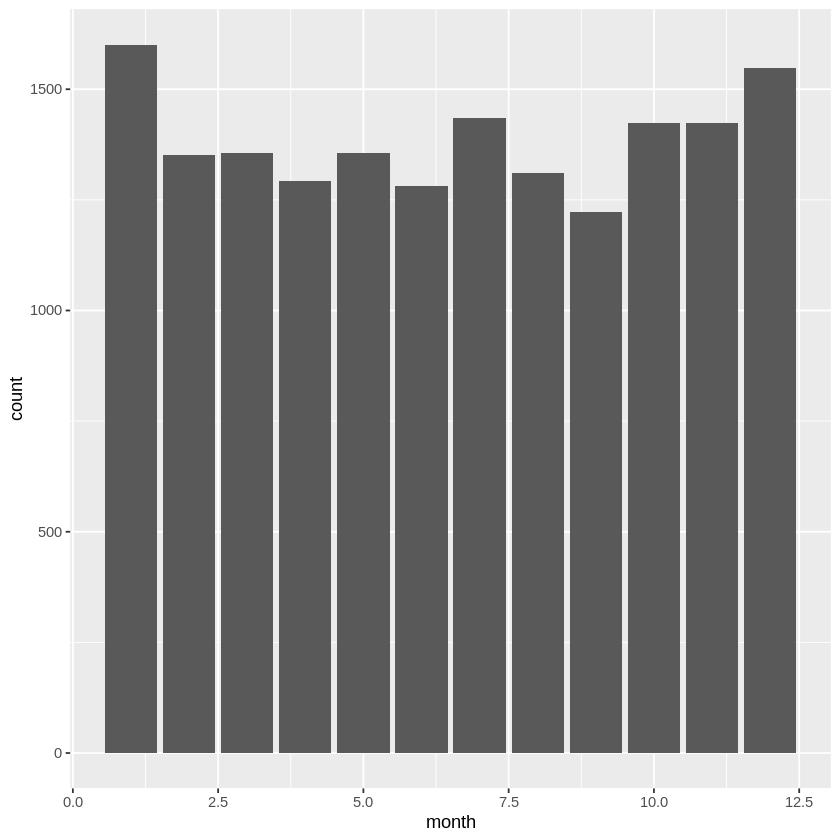

In [73]:
data %>% 
filter(is_arrested == TRUE) %>%
ggplot(aes(x = month)) + geom_bar()

We see arrest rates are higher in the winter than in the summer. 

### Transforming categorical in to nummerical data

You may have noted the `stop_duration` column in our dataset and that it is an `string` variable. That means, we can use it as a dimension but not to perform any calculations. What we can do, is map the categories to a reasonable nummerical value using a mapping dictionary the  `recode` command.

In [95]:
data %>%
count(stop_duration)

stop_duration,n
<chr>,<int>
0-15 Min,386665
1,5
16-30 Min,76323
2,1
30+ Min,17614
NA,29063


In [0]:
data %<>%
  mutate(stop_duration_num =  recode(stop_duration, "0-15 Min" = 7.5 , "16-30 Min" = 23, "30+ Min" = 45, ) )

In [99]:
data %>%
count(stop_duration_num)

stop_duration_num,n
<dbl>,<int>
7.5,386665
23.0,76323
45.0,17614
NA,29069


#### A quick intro to loops

Is quite covered in my R intro.

Warning message:
“Removed 1 rows containing missing values (position_stack).”

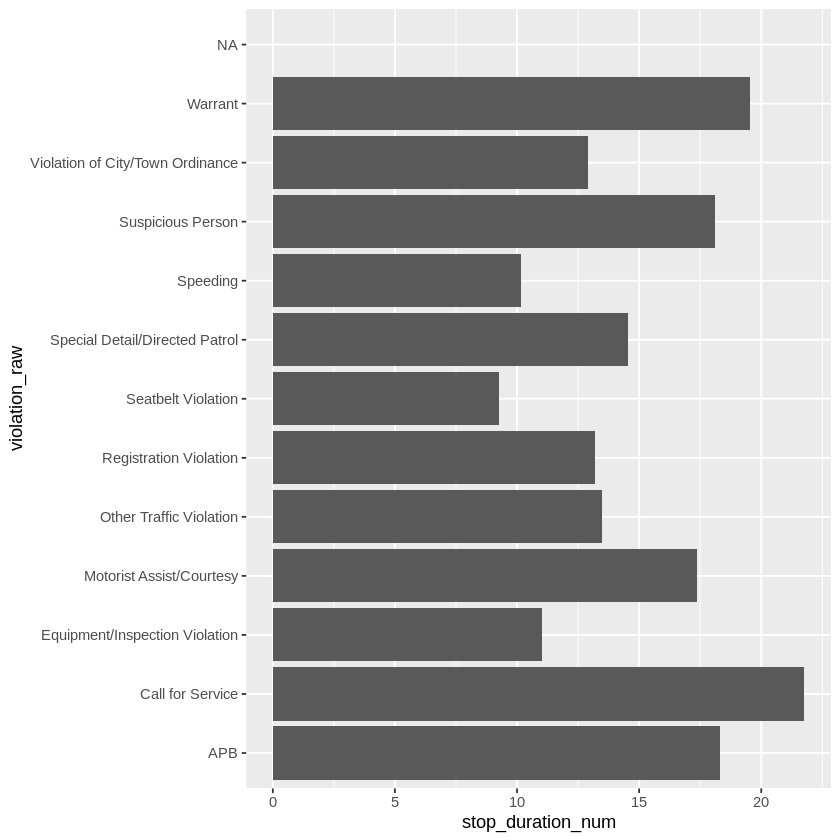

In [104]:
# Let's do everything in one line
data %>%
group_by(violation_raw) %>%
summarize(stop_duration_num = mean(stop_duration_num, na.rm = TRUE))  %>%
ggplot(aes(x = violation_raw, y = stop_duration_num)) +
geom_col() +
coord_flip() # To have horizontal bars

#### Cutting intervals

`driver_age` contains the (duh) the age of the driver. It's a continuous nummerical value and thus good for more advanced analysis but perhaps a bit to detailed for exploration.

More instrumental in that context would be to slice that variable up into ordered categries corresponding to age-populations of interest, say "teen", "20s", "30s" etc.

In [123]:
data %>% select(driver_age) %>% summary()

   driver_age   
 Min.   :15.00  
 1st Qu.:23.00  
 Median :31.00  
 Mean   :33.98  
 3rd Qu.:43.00  
 Max.   :99.00  
 NA's   :30685  

In [124]:
# Create categories with cut()
data %>% 
mutate(driver_age_cat = driver_age %>% cut(5)) %>%
head()

id,state,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,⋯,stop_duration,out_of_state,drugs_related_stop,district,frisk,year,month,day,stop_duration_num,driver_age_cat
<chr>,<chr>,<date>,<time>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<dbl>,⋯,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<dbl>,<dbl>,<int>,<dbl>,<fct>
RI-2005-00001,RI,2005-01-02,01:55:00,Zone K1,NA,NA,600,M,1985,⋯,0-15 Min,FALSE,FALSE,Zone K1,FALSE,2005,1,2,7.5,"(14.9,31.8]"
RI-2005-00002,RI,2005-01-02,20:30:00,Zone X4,NA,NA,500,M,1987,⋯,16-30 Min,FALSE,FALSE,Zone X4,FALSE,2005,1,2,23.0,"(14.9,31.8]"
RI-2005-00003,RI,2005-01-04,11:30:00,Zone X1,NA,NA,000,NA,NA,⋯,NA,NA,FALSE,Zone X1,FALSE,2005,1,4,NA,NA
RI-2005-00004,RI,2005-01-04,12:55:00,Zone X4,NA,NA,500,M,1986,⋯,0-15 Min,FALSE,FALSE,Zone X4,FALSE,2005,1,4,7.5,"(14.9,31.8]"
RI-2005-00005,RI,2005-01-06,01:30:00,Zone X4,NA,NA,500,M,1978,⋯,0-15 Min,FALSE,FALSE,Zone X4,FALSE,2005,1,6,7.5,"(14.9,31.8]"
RI-2005-00006,RI,2005-01-12,08:05:00,Zone X1,NA,NA,000,M,1973,⋯,30+ Min,TRUE,FALSE,Zone X1,FALSE,2005,1,12,45.0,"(31.8,48.6]"


In [130]:
# We can also provide labels
labs <- c("teen", "20s", "30s", "40s", "50+")

# Create categories with cut()
data %>% mutate(driver_age_cat =  driver_age %>% cut(breaks = c(20,30,40,50)) %>% head()

ERROR: ignored